In [1]:
# calling libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = 'darkgrid')
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn as sk
from scipy import stats
from statsmodels.graphics.regressionplots import influence_plot

### Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [2]:
# Loading Data
data = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\5. Multiple Linear Regression\50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data = data.rename({'R&D Spend' : 'RD_Spend', 'Marketing Spend' : 'Marketing_Spend'}, axis = 1)
data.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Scatterplot of the data

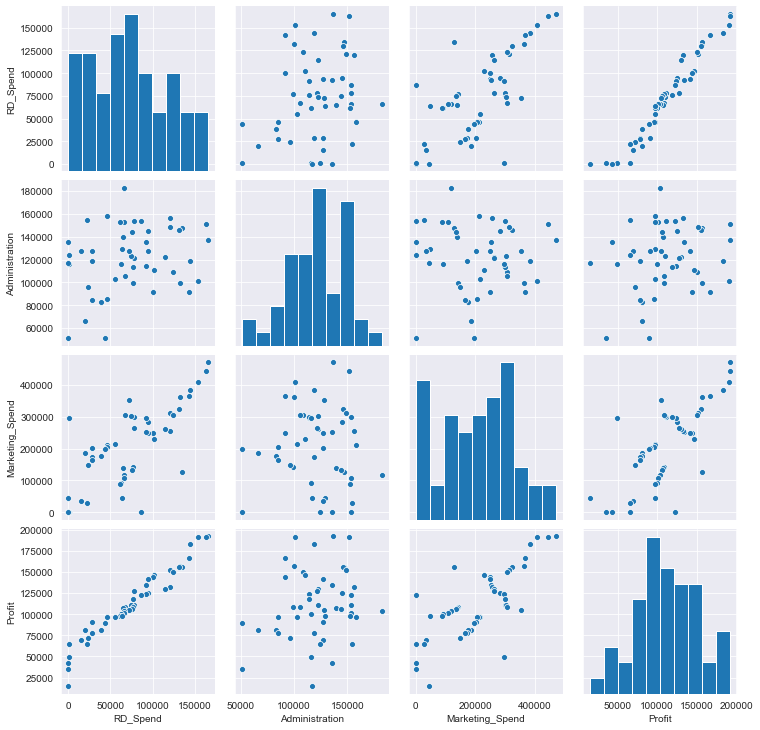

In [6]:
sns.pairplot(data)

# Model Building

In [7]:
model = smf.ols("Profit~RD_Spend+Administration+Marketing_Spend", data = data).fit()
model.pvalues

Intercept          1.057379e-09
RD_Spend           2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64

Here, both Administration and Marketing Spend are insignificant.

Simple Linear Regression 

In [8]:
ml_ad = smf.ols("Profit~Administration",data=data).fit()
ml_ad.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

Administration is an insignificant variable.

In [9]:
ml_ms = smf.ols("Profit~Marketing_Spend",data=data).fit()
ml_ms.pvalues

Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64

Marketing_Spend is significant variable.

Multi Linear Regression of both Administration and Marketing_Spend.

In [10]:
ml_am = smf.ols("Profit~Administration+Marketing_Spend",data=data).fit()
ml_am.pvalues

Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64

In this case both Administration and Marketing_Spend are significant variables.

# Model Validation

Correlation among the variables

In [11]:
data.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Variance Inflation Factor

In [12]:
r_ms = smf.ols("Marketing_Spend~RD_Spend+Administration",data=data).fit().rsquared
vif_ms = 1/(1-r_ms)

r_ad = smf.ols("Administration~RD_Spend+Marketing_Spend",data=data).fit().rsquared
vif_ad = 1/(1-r_ad)

r_rds = smf.ols("RD_Spend~Administration+Marketing_Spend",data=data).fit().rsquared
vif_rds = 1/(1-r_rds)

d = ({'Variables':['R&D Spend','Administration','Marketing Spend'], 'VIF':[vif_rds,vif_ad,vif_ms]})
VIF_frame = pd.DataFrame(d)
VIF_frame

,Variables,VIF
0,R&D Spend,2.468903
1,Administration,1.175091
2,Marketing Spend,2.326773


Residual Analysis

Normality check for residuals by Q-Q Plot

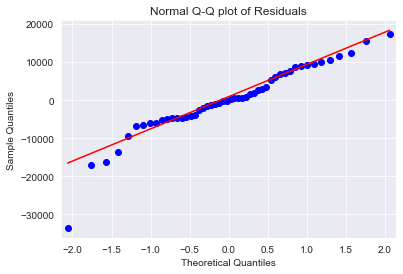

In [13]:
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

The residuals follow normal distribution.

In [14]:
list(np.where(model.resid<-3000))

[array([ 4,  5,  7,  9, 14, 15, 17, 18, 21, 22, 24, 26, 27, 46, 47, 48, 49],
       dtype=int64)]

Residual plot for homoscedasticity (e vs y(cap))

In [15]:
def gets_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

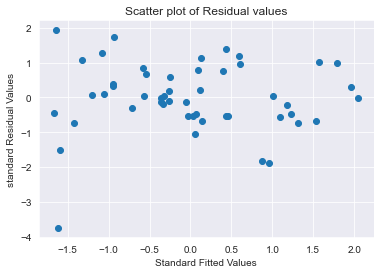

In [16]:
plt.scatter(gets_standardized_values(model.fittedvalues),gets_standardized_values(model.resid))
plt.title('Scatter plot of Residual values')
plt.xlabel('Standard Fitted Values')
plt.ylabel('standard Residual Values')
plt.show()

Residuals vs Regressors (error vs independent variables)

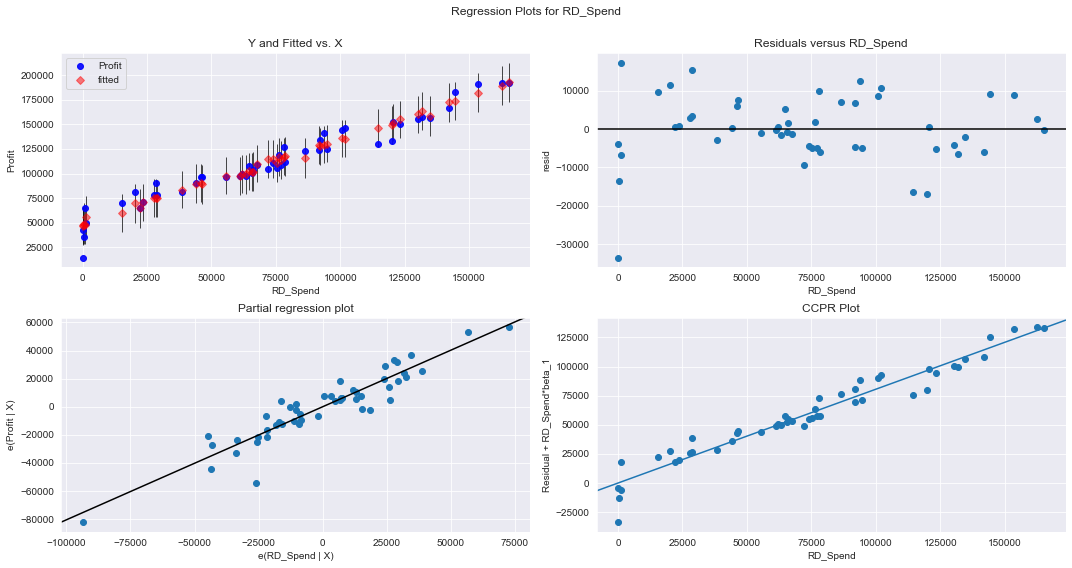

In [17]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

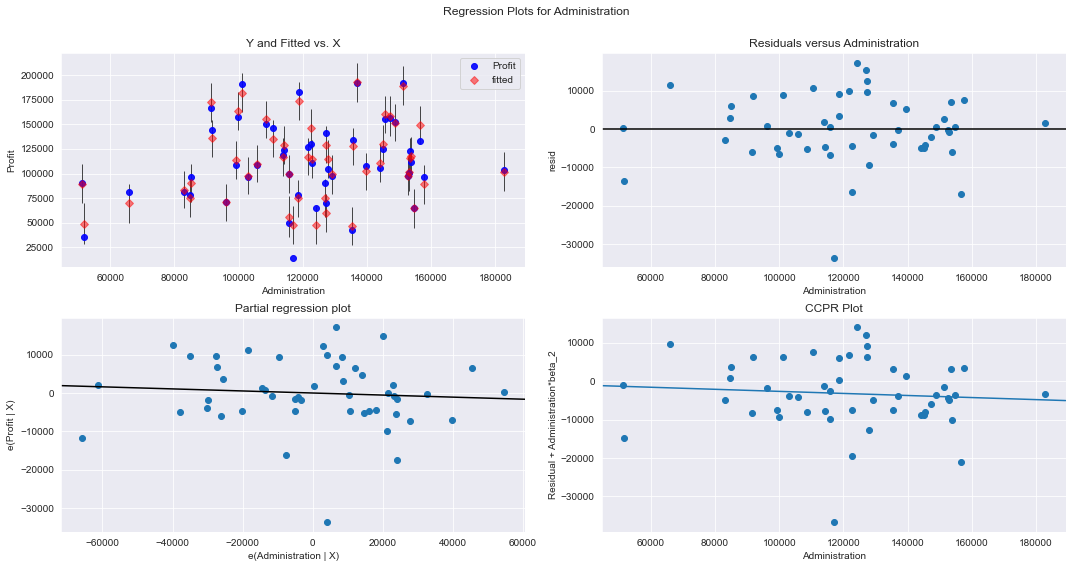

In [18]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

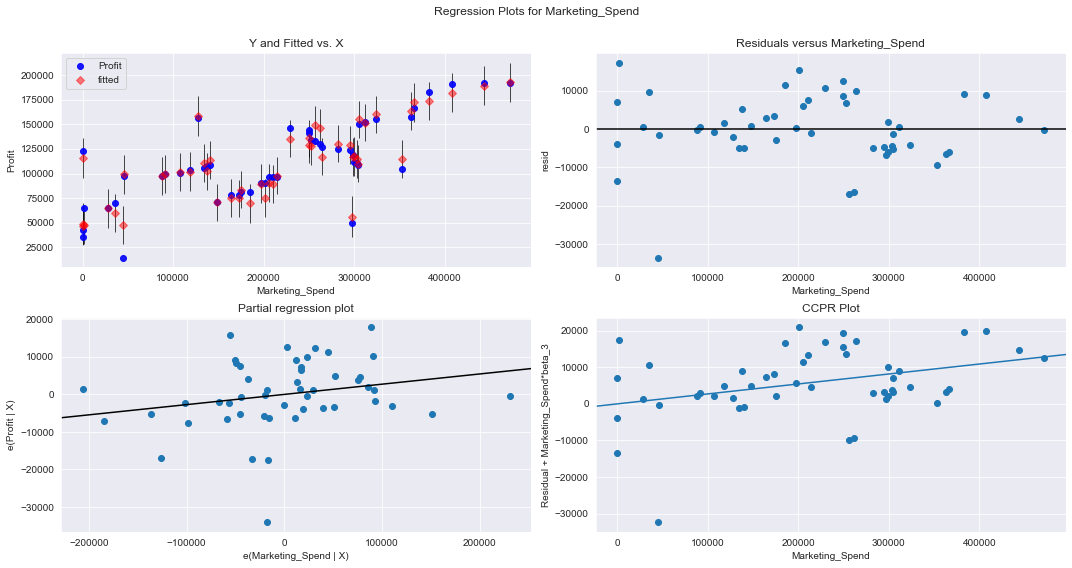

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

### Cook's Distance

In [20]:
model_influence = model.get_influence()
(c,_)  = model_influence.cooks_distance

<ipython-input-21-eef3f373163e>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data)), np.round(c,3))


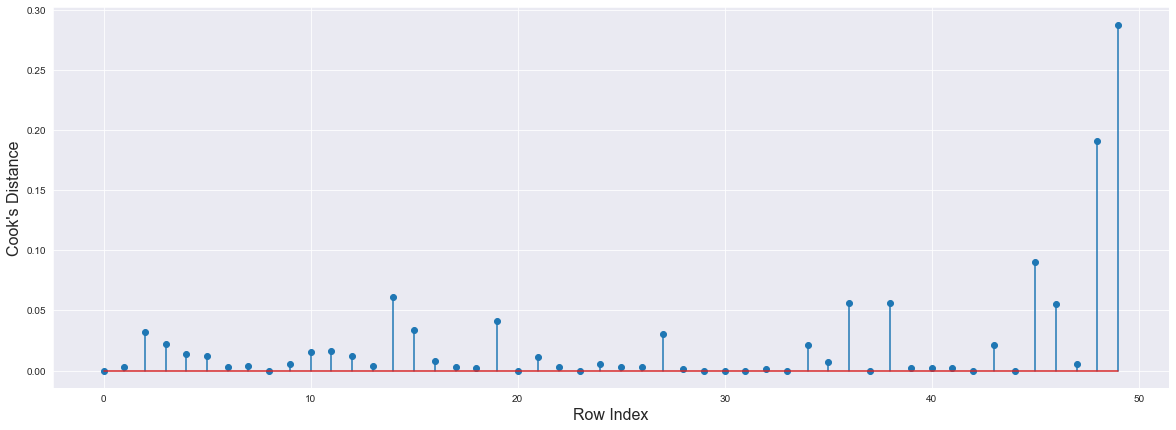

In [21]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row Index', size=16)
plt.ylabel("Cook's Distance", size=16)
plt.show()

In [22]:
# index and value of the influencer
(np.argmax(c),np.max(c))

(49, 0.28808229275432584)

### High Influence Points

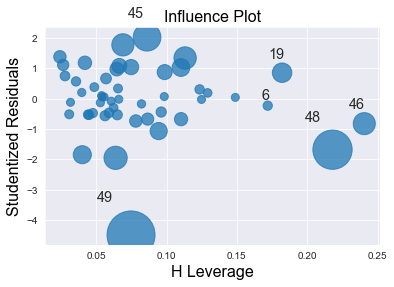

In [23]:
influence_plot(model)
plt.show()

In [24]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.36

#### From the influence plot, it is clear that 48 and 49 are influencers.

# Improving Model

#### Eliminating 48th and 49th row from the data

In [25]:
new_data = data
new_data = new_data.drop(new_data.index[[48,49]],axis=0).reset_index()
new_data = new_data.drop(['index'],axis=1)

#### Building Model with New Data

In [26]:
model_ad = smf.ols("Profit~RD_Spend+Administration", data=new_data).fit()
(model_ad.rsquared,model_ad.aic)

(0.9613542664192156, 994.3402293693792)

In [27]:
model_ms = smf.ols("Profit~RD_Spend+Marketing_Spend", data=new_data).fit()
(model_ms.rsquared,model_ms.aic)

(0.9609119875752478, 994.8864429429412)

#### Cook's Distance

In [28]:
model_influence_ad = model_ad.get_influence()
(c_ad,_) = model_influence_ad.cooks_distance

<ipython-input-29-451e5ad8a0f0>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(new_data)),np.round(c_ad,3))


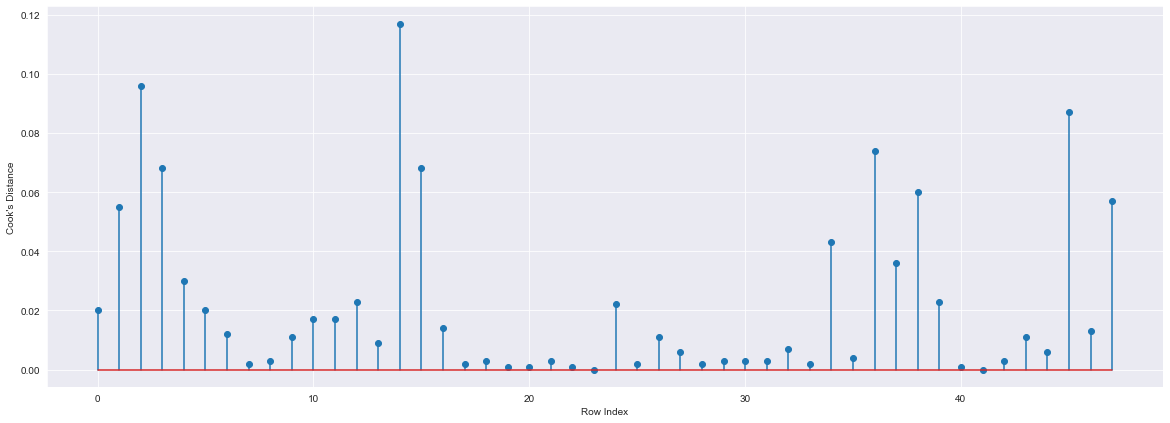

In [29]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(new_data)),np.round(c_ad,3))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.show()

In [30]:
(np.argmax(c_ad),np.max(c_ad))

(14, 0.11654464976722431)

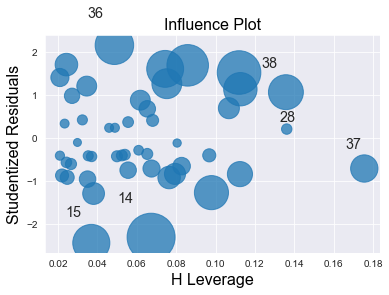

In [31]:
influence_plot(model_ad)
plt.show()

In [32]:
data_new = new_data.drop(new_data.index[[14]],axis=0).reset_index()
data_new = data_new.drop("index",axis=1)
data_new

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [33]:
new_model = smf.ols("Profit~RD_Spend+Administration",data=data_new).fit()
model_influence_ad = new_model.get_influence()
(c_ad,_) = model_influence_ad.cooks_distance

<ipython-input-34-7a84cb5f2723>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data_new)),np.round(c_ad,3))


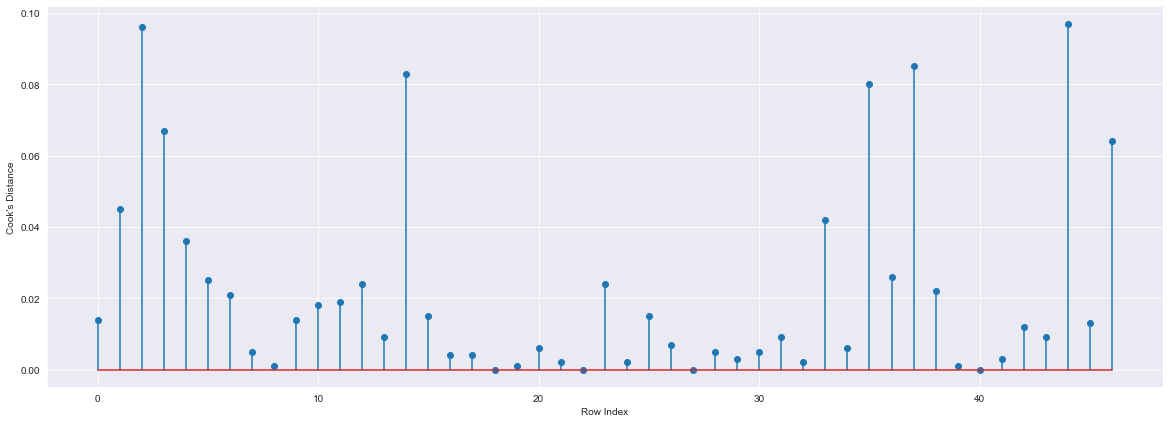

In [34]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_new)),np.round(c_ad,3))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.show()

#### Now the value of Cook's Distance is less than 0.1, we can stop the diagonosis and finalize the model.

## Let us check how the model does the Prediction.

In [35]:
data_check = pd.DataFrame({'RD_Spend':73000,'Administration':110000,'Marketing_Spend':200000},index=[1])
data_check

,RD_Spend,Administration,Marketing_Spend
1,73000,110000,200000


In [36]:
new_model.predict(data_check)

1    113729.670519
dtype: float64

In [37]:
predicted_profit = new_model.predict(data_new)
predicted_profit = pd.DataFrame({'Predicted Profit':new_model.predict(data_new)})

In [38]:
# new dataframe
Predicted_data = pd.concat([data_new,predicted_profit],axis=1)

In [39]:
Predicted_data

,RD_Spend,Administration,Marketing_Spend,State,Profit,Predicted Profit
0,165349.20,136897.80,471784.10,New York,192261.83,188464.428401
1,162597.70,151377.59,443898.53,California,191792.06,185189.563454
2,153441.51,101145.55,407934.54,Florida,191050.39,181042.426466
3,144372.41,118671.85,383199.62,New York,182901.99,172319.779638
4,142107.34,91391.77,366168.42,Florida,166187.94,172312.705258
5,131876.90,99814.71,362861.36,New York,156991.12,163251.451757
6,134615.46,147198.87,127716.82,California,156122.51,162272.170087
7,130298.13,145530.06,323876.68,Florida,155752.60,158806.530873
8,120542.52,148718.95,311613.29,New York,152211.77,150498.043612
9,123334.88,108679.17,304981.62,California,149759.96,155560.020437
